In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


import seaborn as sns 
import math

%matplotlib inline 


In [2]:
#1-Open dataset
hotel=pd.read_csv('hotel_bookings.csv')
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
#2-show data details
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#3-show number of rows and columns
hotel.shape

(119390, 32)

In [5]:
#4-check on null values 
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#5-Data cleaning(drop)

#drops columns 
hotel.drop(['total_of_special_requests','assigned_room_type',
            'booking_changes','days_in_waiting_list'],
           axis=1,inplace=True)




In [7]:
#6-show number of rows and columns
hotel.shape

(119390, 28)

In [8]:
#7-Data cleaning(null values)

#fillna all the null value in columns
hotel['agent'] = hotel['agent'].fillna('Not Applicable')
hotel['company'] = hotel['company'].fillna('Not Applicable')

In [9]:
#fillna all the columns that have null values 
hotel['country'] = hotel['country'].fillna(0)
hotel['children'] = hotel['children'].fillna('Unknown')



In [10]:
#8-check on null values 
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
company                           0
customer_type                     0
adr                               0
required_car_parking_spaces       0
reservation_status                0
reservation_status_date     

In [18]:
hotel

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0,...,0,C,No Deposit,Not Applicable,Not Applicable,Transient,0.00,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0,...,0,C,No Deposit,Not Applicable,Not Applicable,Transient,0.00,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0,...,0,A,No Deposit,Not Applicable,Not Applicable,Transient,75.00,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0,...,0,A,No Deposit,304,Not Applicable,Transient,75.00,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,0,...,0,A,No Deposit,240,Not Applicable,Transient,98.00,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City Hotel,0,23,2017,August,35,30,2,5,2,0,...,0,A,No Deposit,394,Not Applicable,Transient,96.14,0,Check-Out,2017-09-06
City Hotel,0,102,2017,August,35,31,2,5,3,0,...,0,E,No Deposit,9,Not Applicable,Transient,225.43,0,Check-Out,2017-09-07
City Hotel,0,34,2017,August,35,31,2,5,2,0,...,0,D,No Deposit,9,Not Applicable,Transient,157.71,0,Check-Out,2017-09-07


In [13]:
h1=hotel['hotel'].value_counts()
h1

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

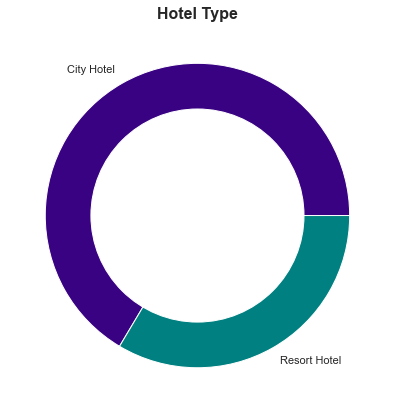

In [50]:
#Q1:What types of hotels do people book the most?

names= ['City Hotel','Resort Hotel']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(h1,labels=names,colors=['#380282','#008080'])
p=plt.gcf()
sns.set(rc={'figure.figsize':(12,7)})


p.gca().add_artist(my_circle)
plt.title('Hotel Type', fontdict = {'fontsize': 16},weight = 'bold')
plt.show()

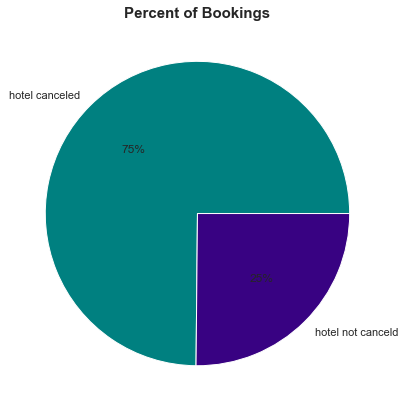

In [102]:
#Q2: What is the percent of bookings that confirmed, and canceled

h2=hotel.groupby(['hotel'])['is_canceled'].sum()
labels=['hotel canceled','hotel not canceld']

sns.set(rc={'figure.figsize':(11,7)})


plt.pie(h2, labels=labels ,colors=colors,autopct='%.0f%%');
plt.title('Percent of Bookings', fontdict = {'fontsize': 15},weight = 'bold');




In [58]:
hotel['arrival_date_month'].value_counts()


August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

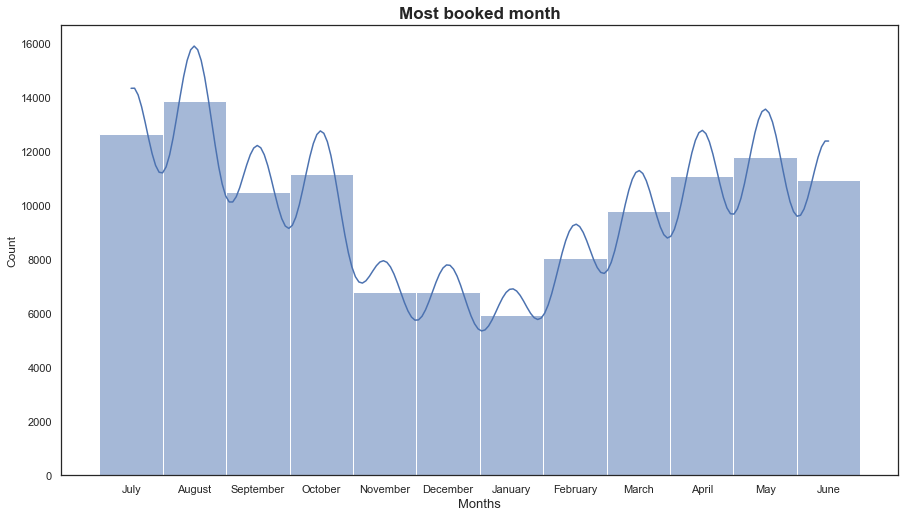

In [104]:

#Q3:What is the most booked month of the year?  
  

sns.set_style("white") # darkgrid, whitegrid, dark, white, ticks
hotel['arrival_date_month'].value_counts()
#h5=hotel.groupby['arrival_date_month'].max()
sns.histplot(x = 'arrival_date_month',data=hotel,kde=True);


sns.set(rc={'figure.figsize':(15,8.29)})
plt.xlabel('Months',fontdict = {'fontsize': 13});
plt.title('Most booked month',fontdict = {'fontsize': 17},weight = 'bold');



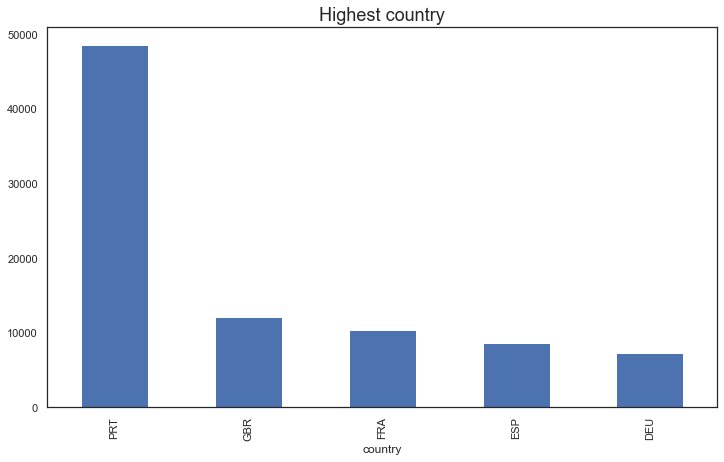

In [100]:
#Q4:Which country has the highest reservations?
sns.set_style("white")
hotel['country'].value_counts().head().plot(kind='bar');

plt.xlabel('country')
plt.title('Highest country', fontdict = {'fontsize': 18});
sns.set(rc={'figure.figsize':(15,12)})



In [70]:
hotel['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [89]:
ml=hotel['meal'].value_counts()
ml

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

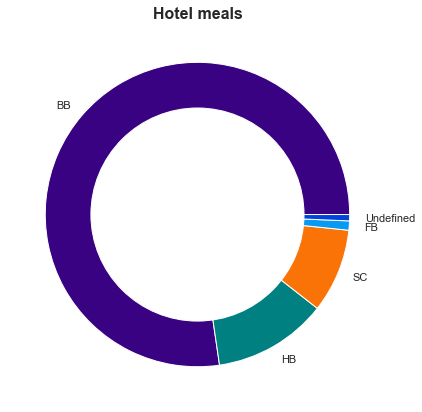

In [99]:
#Q5:What meals are people usually interested in?
names= ['BB','HB','SC','FB','Undefined']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(ml,labels=names,colors=['#380282','#008080','#F97306','#069AF3','#04D'])
p=plt.gcf()
sns.set(rc={'figure.figsize':(12,7)})


p.gca().add_artist(my_circle)
plt.title('Hotel meals', fontdict = {'fontsize': 16},weight = 'bold')
plt.show()

In [72]:
hotel['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [73]:

#rename values 
hotel['reserved_room_type'].replace({'A':'A Single room','B':'Suite',
                         'C':'Joint room','D':'Cabana',
                         'E':'Triple room','F':'Connecting room',
                         'G':'Deluxe room','H':'Penthouse',
                         'P':'Accessible room','L':'Apartment-style'},inplace=True)


hotel



,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0,...,0,Joint room,No Deposit,Not Applicable,Not Applicable,Transient,0.00,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0,...,0,Joint room,No Deposit,Not Applicable,Not Applicable,Transient,0.00,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0,...,0,A Single room,No Deposit,Not Applicable,Not Applicable,Transient,75.00,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0,...,0,A Single room,No Deposit,304,Not Applicable,Transient,75.00,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,0,...,0,A Single room,No Deposit,240,Not Applicable,Transient,98.00,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City Hotel,0,23,2017,August,35,30,2,5,2,0,...,0,A Single room,No Deposit,394,Not Applicable,Transient,96.14,0,Check-Out,2017-09-06
City Hotel,0,102,2017,August,35,31,2,5,3,0,...,0,Triple room,No Deposit,9,Not Applicable,Transient,225.43,0,Check-Out,2017-09-07
City Hotel,0,34,2017,August,35,31,2,5,2,0,...,0,Cabana,No Deposit,9,Not Applicable,Transient,157.71,0,Check-Out,2017-09-07


In [74]:
#Q6:What is the most reserved room type ?
hotel['reserved_room_type'].unique()

array(['Joint room', 'A Single room', 'Cabana', 'Triple room',
       'Deluxe room', 'Connecting room', 'Penthouse', 'Apartment-style',
       'Accessible room', 'Suite'], dtype=object)

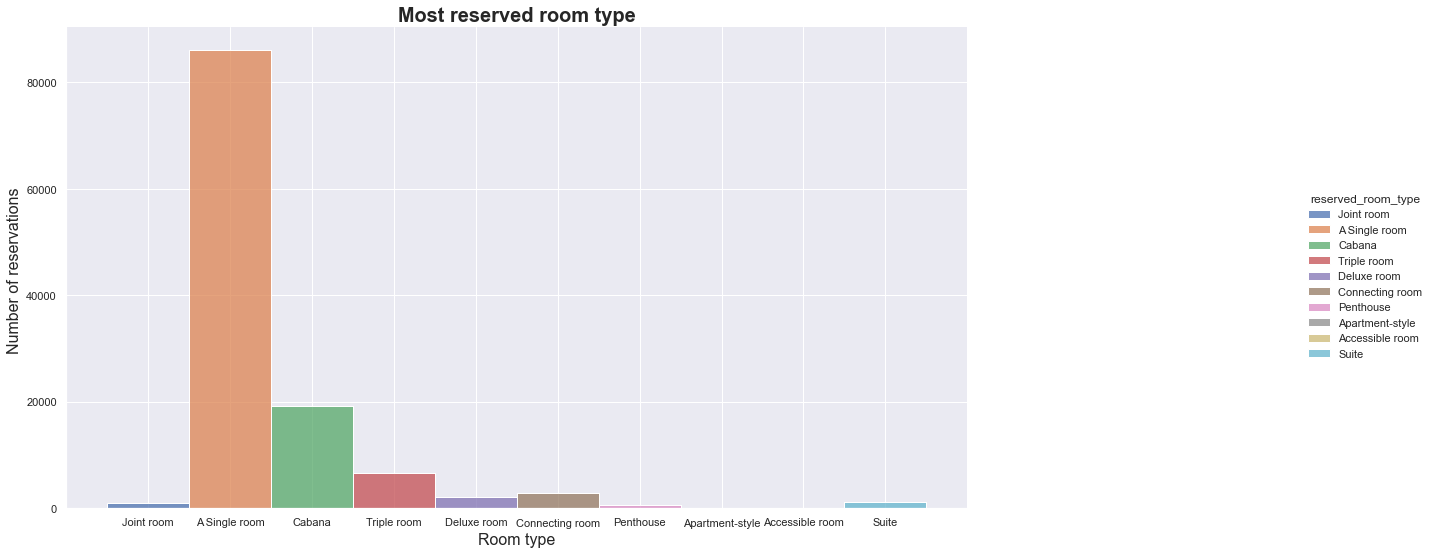

In [75]:
sns.displot(data=hotel, x="reserved_room_type", hue="reserved_room_type", multiple="stack");
plt.xlabel('Room type',fontdict = {'fontsize': 16})
plt.ylabel('Number of reservations ',fontdict = {'fontsize': 16})


plt.title('Most reserved room type',fontdict = {'fontsize': 20},weight = 'bold')
plt.gcf().set_size_inches(22, 8)

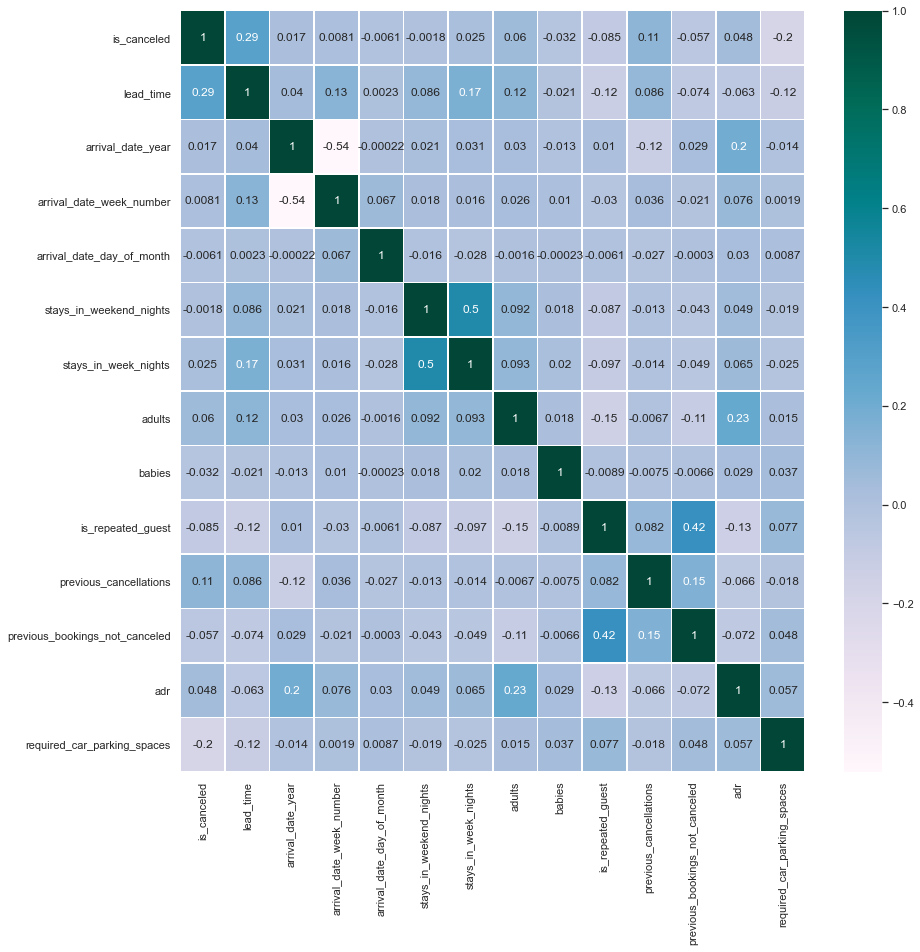

In [127]:
#corrlation  
plt.figure(figsize = (14,14)) 
sns.heatmap(hotel.corr(),linewidths=0.6, annot = True, cmap = "PuBuGn"); # as heatmap 

